# KSA: Polar Observations and Modelling

# Week 6 - Gridded data

We have worked with CTD profiles in the previous classes. CTDs are the best quality data we can obtain, but oceanographic cruises are very expensive to run. There are a number of other way to obtain in-situ observations in the ocean that are cheaper and can provide better space and time coverage, albeit at the expense of quality. 

<div style="float: right; margin-right: 20px; margin-left: 30px; width: 25%;">
    <img src="images/argo.jpg" width="100%"/>
</div>

#### Argo floats

A really important observing system is the network of [Argo floats](https://www.aoml.noaa.gov/argo/). These are autonomous profiling buoys that drift with the ocean's currents, going up and down through the water column measuring temperature and salinity and periodically re-surface to transmit data via satellite.

They Argo network provides something around 100.000 profiles a year, and each of them has a lifespan of around 5 years, costing something around 30k. To put this into context: the I09S CTD data we have been working on consists in around 70 CTD profiles, which took around 1 month to obtain, using a ship (RV Investigator) that has an operational cost of around 150k. That is 4.5 million dollars for a 30 day voyage. Of course, the RV Investigator allows for much more science to happen on board, not just CTD profiles. 

In any case, Argo floats really are a before and after for our ocean observing system - we talk about a "pre-Argo" and "post-Argo" period. And recently they have started carrying sensors other than just temperature and salinity (i.e. nytrogen sensors), some are able to resist higher pressures and go deeper into the ocean, and even navigate in ice covered areas.

You can see a careful Argo float deployment on the right. Much faster than a CTD!

#### Other observations

There are other types of in-situ observing systems. One that is takng importance around the hard-to-access Antarctic margins is the marine observing mammals. Essentially, small sensors are glued on, for example elephant seals, as these mammals usually dive deep when foraging for food. The sensors drop off during the molt season. 

Another very cheap type of sensor is the XBT (eXpendable BathyTermograph), which measures pressure and temperature of the upper ~500m of the water column. It is disposable, does not require any expertise to deploy, and is usually "oportunistic", meaning that we can give cargo ships and other non-oceanographic vessels a bunch of XBTs to deploy with no cost other than their purchase.

### Collating all observations into a gridded product

Using statistical and numerical techniques, all the observations we have available in the ocean can be put together into a "gridded" product. Gridded products are nice and easy to work with. We don't need to spend time and effort doing fancy interpolations (like in `1_Building_a_cross_section.ipynb`), we can just grab a dataset with time, longitude, and latitude information that works out of the box!

However, it is really important to understand the limitations of the dataset. For example, in the Southern Ocean, data is scarse in regions of extensive sea ice cover like the southwestern Weddell Sea, and winter observations are very, very few. So even thoug our gridded product will have information in those regions, it should be taken with a pinch of salt due to the limited observations that are assimilated. 

*Food for thought: where do you think there's more observations available, at surface or at depth? Therefore, in a gridded product, which region should we be cautious about?*

## EN.4.2.2

This class we are going to work with a gridded product developed by MetOffice in the UK called [EN.4.2.2.](https://www.metoffice.gov.uk/hadobs/en4/index.html). This product has assimilated CTD, XBT and Argo profiles amongst others, interpolated them onto a horizontal grid of $1 ^{\circ} \times 1 ^{\circ}$ (1 degree latitude and 1 degree longitude), and 50 vertical levels. Unlike the previous data we have used in the first week, these vertical levels are *depth*, not pressure.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import gsw
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

Let's open our gridded product. As the name says, this dataset contains annual averages from the year 1970 to 2021.

In [2]:
EN422 = xr.open_dataset('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class3/data/EN422_annual_averages_1970-2021.nc')
EN422

<xarray.Dataset> Size: 2GB
Dimensions:                          (depth: 42, lat: 49, time: 52, lon: 360,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 168B 5.022 ... 5.35e+03
  * lat                              (lat) float32 196B -83.0 -82.0 ... -35.0
  * time                             (time) datetime64[ns] 416B 1970-07-01T16...
  * lon                              (lon) float32 1kB -180.0 -179.0 ... 179.0
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float64 308MB ...
    salinity                         (time, depth, lat, lon) float64 308MB ...
    temperature_uncertainty          (time, depth, lat, lon) float64 308MB ...
    salinity_uncertainty             (time, depth, lat, lon) float64 308MB ...
    temperature_observation_weights  (time, depth, lat, lon) float32 154MB ...
    salinity_observation_weights     (time, depth, lat, lon) float32 154MB ...
    time_bnds                        (time, bnds) datetime64[ns] 832B ...
    depth_bnds                       (depth, bnds) float32 336B ...
Attributes: (12/23)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...
    NCO:                    netCDF Operators version 5.0.7 (Homepage = http:/...

## What data included in EN4.2.2?

Like we said at the beginning, the Southern Ocean suffers from scarsity in observations, and we should be cautious about gridded products since, if they are not assimilating much data in given months or locations, what they're showing might not be real. 

So let's put this dataset in context, looking at the number of observations that are been included, per month, as well as their locations.

In [7]:
number_of_profiles = xr.open_dataset('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class3/data/EN422_number_of_profiles_per_month.nc')
number_of_profiles

<xarray.Dataset> Size: 20kB
Dimensions:     (year_month: 634)
Coordinates:
  * year_month  (year_month) <U6 15kB '197001' '197002' ... '202209' '202210'
Data variables:
    N_profiles  (year_month) float64 5kB ...

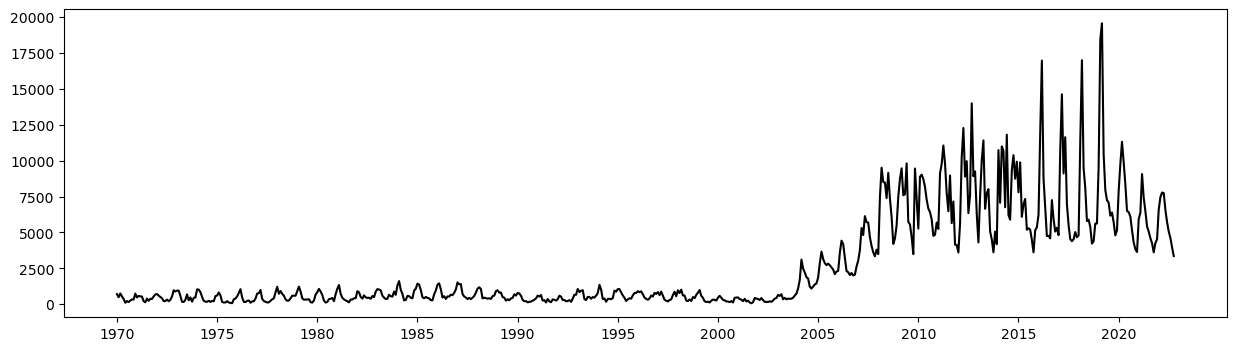

In [12]:
plt.figure(figsize = (15, 4))
plt.plot(number_of_profiles['N_profiles'], color = 'k')
plt.xticks(np.arange(0, 634, 12*5),     # Placing ticks every five years (12 months times 5)
           np.arange(1970, 2022, 5));   # Placing the labels

#### Question 1

**a.** What are the little wiggles in the data?

**b.** What's behind the big increase around 2005?

*Answer here*

Now we can take a look at the locations. These also come per month.

In [6]:
locations = xr.open_dataset('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class3/data/EN422_profile_locations_per_month.nc')
locations

<xarray.Dataset> Size: 199MB
Dimensions:    (date: 634, N_prof: 19567)
Coordinates:
  * date       (date) <U6 15kB '197001' '197002' '197003' ... '202209' '202210'
  * N_prof     (N_prof) float64 157kB 0.0 1.0 2.0 ... 1.956e+04 1.957e+04
Data variables:
    latitude   (date, N_prof) float64 99MB ...
    longitude  (date, N_prof) float64 99MB ...

We will use a new fancy stereographic projection to plot. To make it a circle instead of a square requires a few extra lines of code. It is not that important to understand them, we can just copy and paste them everytime we want to use them.

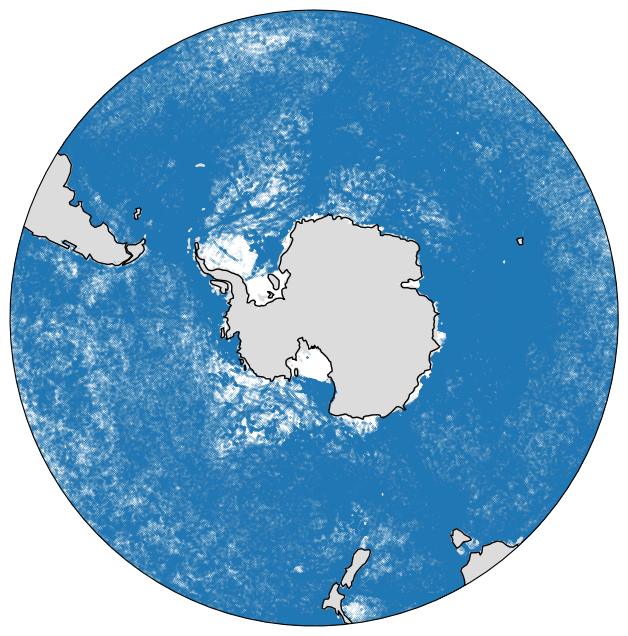

In [14]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection = ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -80, -35], crs = ccrs.PlateCarree())
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='gainsboro',
                                        facecolor='gainsboro'))
ax.coastlines(resolution = "110m")

# Map the plot boundaries to a circle
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

for d in locations['date']:
    plt.scatter(locations['longitude'].sel(date = d).values, 
                locations['latitude'].sel(date = d.values),
                s = 0.01, c = 'C0', transform = ccrs.PlateCarree())

Doesn't look that bad! *But remember this are ALL the profiles since 1970*. As our time series above shows, most of these observations have been taken post 2005.

Let's look at all the profiles taken in January, and all the profiles taken in July. For this we can iterate through each January/July and plot. We know that the dataset has monthly information, and that it starts in January, so we can select all dates starting from the first, and skipping the next 11 by doing `locations['date'][::12]`. To start in July, we just need to `locations['date'][6::12]`

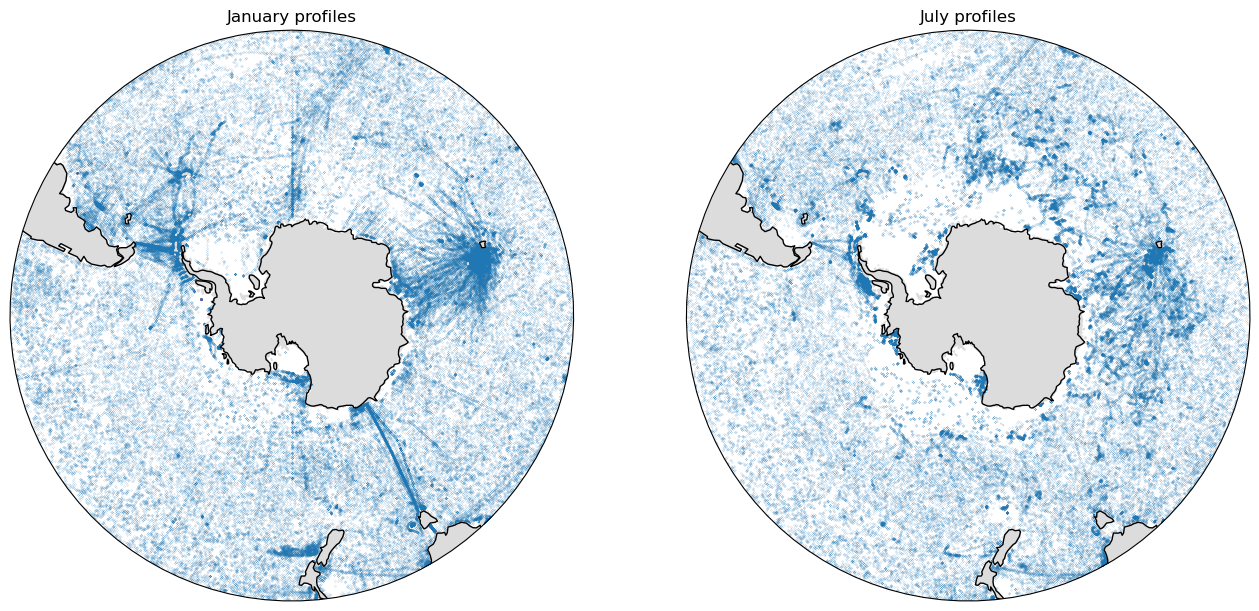

In [8]:
fig = plt.figure(figsize = (16, 8))
axs = [fig.add_subplot(121, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(122, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax.set_extent([-180, 180, -80, -35], crs = ccrs.PlateCarree())
    ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='gainsboro',
                                            facecolor='gainsboro'))
    ax.coastlines(resolution = "110m")
    # Map the plot boundaries to a circle
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

for d in locations['date'][::12]:
    axs[0].scatter(locations['longitude'].sel(date = d).values, 
                   locations['latitude'].sel(date = d.values),
                   s = 0.01, c = 'C0', transform = ccrs.PlateCarree())
    
for d in locations['date'][6::12]:
    axs[1].scatter(locations['longitude'].sel(date = d).values, 
                   locations['latitude'].sel(date = d.values),
                   s = 0.01, c = 'C0', transform = ccrs.PlateCarree())
    
axs[0].set_title('January profiles')
axs[1].set_title('July profiles');

Look how very few observations have happened in July in the Ross and Weddell Seas. These are 50 years of data! And there's very few there!

Also note how there are a few lines with many observations. Some of these are resupply lines, with boats doing them often to provide Antarctic bases doing opportunistic XBTs. And then there's all those observations near the Kerguelen Islands. There are seals!

#### Question 2

**a.** Using the number of profiles per month since 1970, can you find out which month of the year has the most observations and which the least?

**b.** Discuss what preccautions you would take when using the EN4.2.2. dataset.

**c.** What other important information/dimension of the observations assimilated we have we not explored?

*Answer here*

# Time mean plots

Let's begin by doing some plots of the time mean of our dataset. It is a bit tirig to have to copy and paste the code for the stereographic plot, so we will define a function that does it for us. Then everytime we want a stereoplot, we just call it!

In [9]:
def stereographic_axis(ax):
    
    ax.set_extent([-180, 180, -80, -35], crs = ccrs.PlateCarree())
    ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='gainsboro',
                                            facecolor='gainsboro'))
    ax.coastlines(resolution = "110m")
    # Map the plot boundaries to a circle
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    return ax

Let's plot mean surface temperature and salinity:

In [14]:
surface_temp = EN422['temperature'].mean('time').sel(depth = 0, method = 'nearest')
surface_salt = EN422['salinity'].mean('time').sel(depth = 0, method = 'nearest')

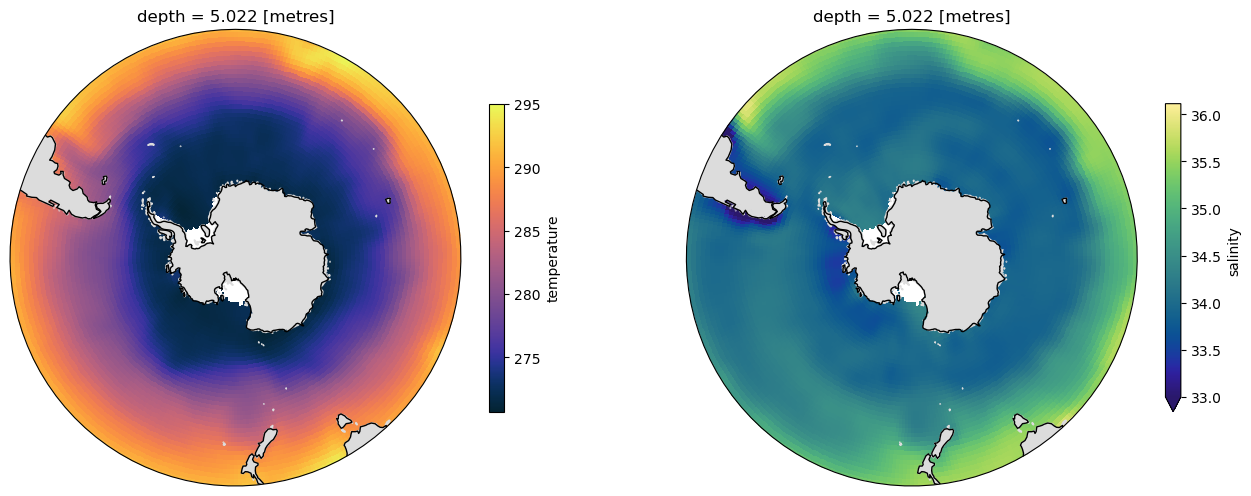

In [16]:
fig = plt.figure(figsize = (16, 8))
axs = [fig.add_subplot(121, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(122, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax = stereographic_axis(ax)
surface_temp.plot(ax = axs[0], cmap = cm.cm.thermal, 
                  transform = ccrs.PlateCarree(), cbar_kwargs = {'shrink':0.5})
surface_salt.plot(ax = axs[1], cmap = cm.cm.haline, vmin = 33, 
                  transform = ccrs.PlateCarree(), cbar_kwargs = {'shrink':0.5});

#### Question 3

There's something strange happening in the land in the plots above. Can you see what it is? Fix it!

*Answer here*

Now that we can calculating a zonal average, which is just the mean in longitude space, and will allow us to see the vertical structure of the Southern Ocean:

In [20]:
temp_zonal_ave = EN422['temperature'].mean('lon').mean('time')
salt_zonal_ave = EN422['salinity'].mean('lon').mean('time')

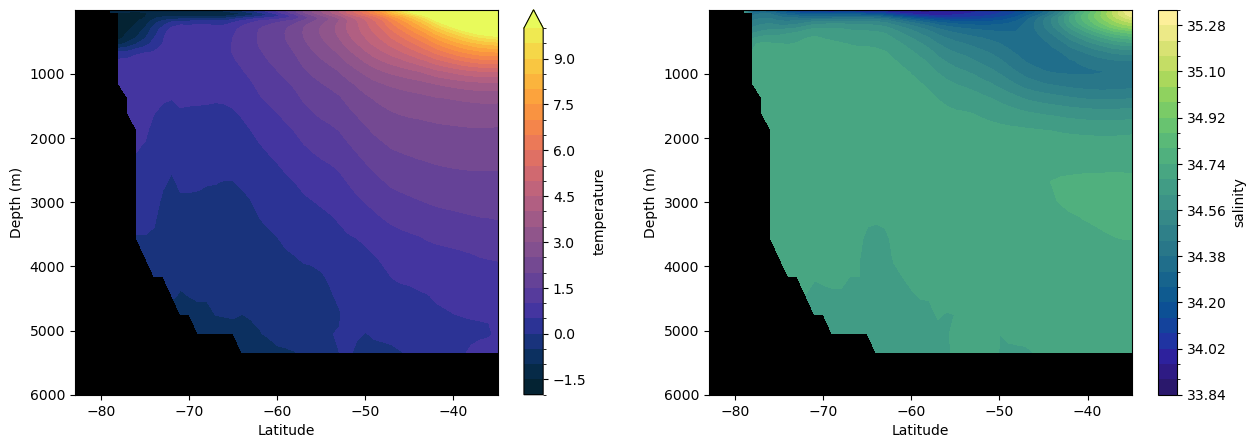

In [21]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))

temp_zonal_ave.plot.contourf(ax = axs[0], cmap = cm.cm.thermal, levels = 25,
                                          vmin = -2, vmax = 10)
salt_zonal_ave.plot.contourf(ax = axs[1], cmap = cm.cm.haline, levels = 25)

for ax in axs:
    ax.invert_yaxis()
    ax.set_ylim(6000, None)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)');   
    ax.set_facecolor('k');

# Changes through out time

Let's look at how the temperature and salinity in the Southern Ocean have changed in the observational period. 

## Spatial pattern of change

We can begin by looking at the difference between the last decade and the first decade of the dataset!

In [22]:
temp_2010_2020 = EN422['temperature'].sel(time = slice('2010-01-01', '2020-12-31')).mean('time')
temp_1970_1980 = EN422['temperature'].sel(time = slice('1970-01-01', '1980-12-31')).mean('time')

salt_2010_2020 = EN422['salinity'].sel(time = slice('2010-01-01', '2020-12-31')).mean('time')
salt_1970_1980 = EN422['salinity'].sel(time = slice('1970-01-01', '1980-12-31')).mean('time')

In [23]:
surface_temp_change = (temp_2010_2020 - temp_1970_1980).isel(depth = 0)
surface_salt_change = (salt_2010_2020 - salt_1970_1980).isel(depth = 0)

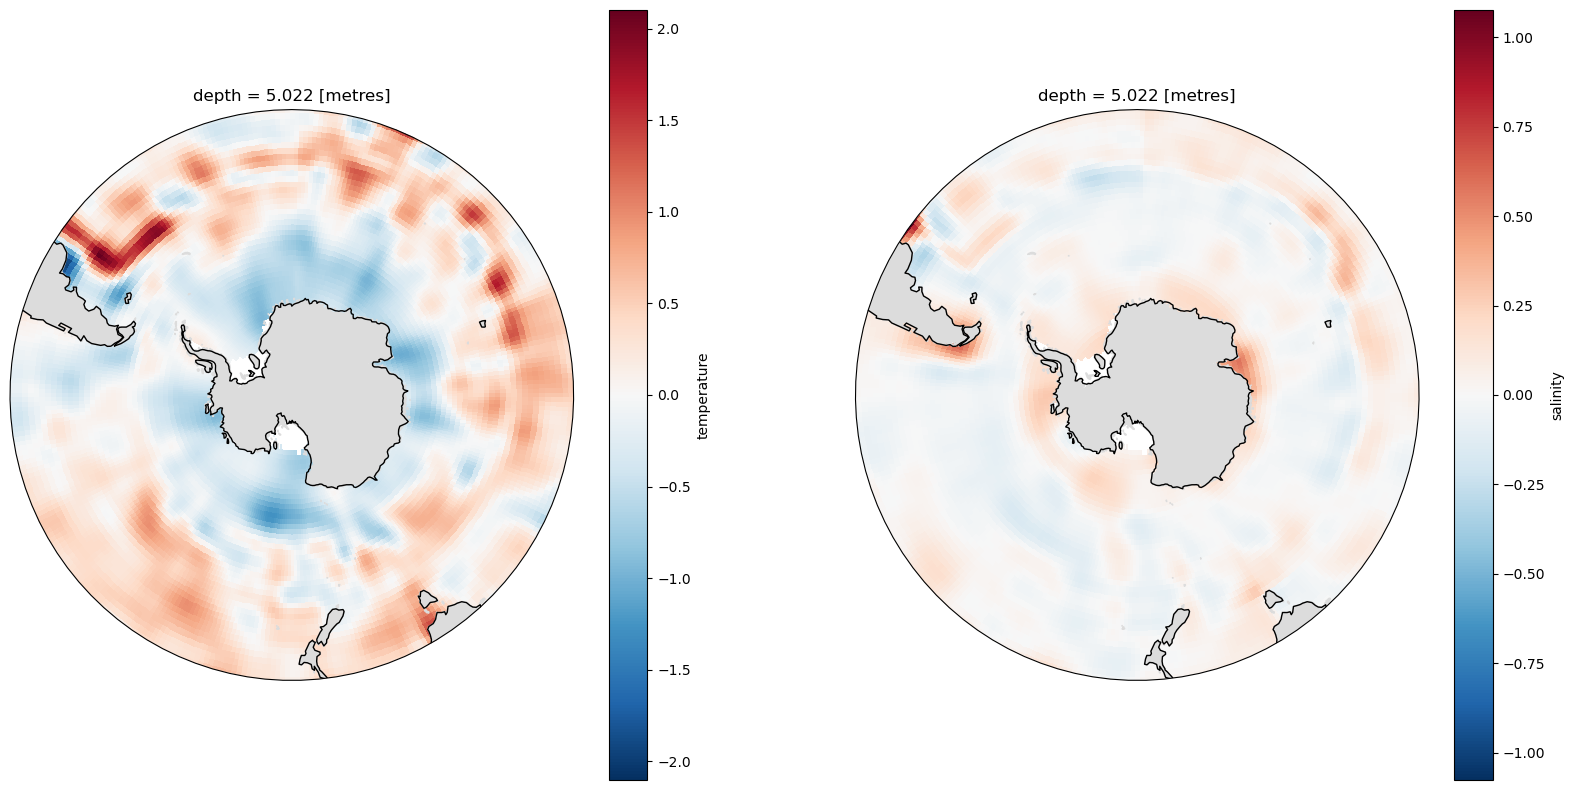

In [26]:
fig = plt.figure(figsize = (20, 10))
axs = [fig.add_subplot(121, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(122, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax = stereographic_axis(ax)

surface_temp_change.plot(ax = axs[0], cmap = 'RdBu_r',
                         transform = ccrs.PlateCarree())
surface_salt_change.plot(ax = axs[1], cmap = 'RdBu_r',
                         transform = ccrs.PlateCarree());

#### Question 4

Can you make this plot a bit nicer? Shrink the colorbars, add labels and a title? Choose appropriate ranges for the colorbar to better visualize the changes.

*Answer here*

The maps above seem to hint that around the Antarctic margins the ocean has cooled, and even closer to the Antarctic margins, it has become saltier. We could try averaging our temperatures and salinities south of 60$^{\circ}$S to make a time series:

In [36]:
surface_temp_averaged = EN422['temperature'].sel(depth = 0, method = 'nearest').sel(lat = slice(None, -60)).mean(['lat', 'lon'])
surface_salt_averaged = EN422['salinity'].sel(depth = 0, method = 'nearest').sel(lat = slice(None, -60)).mean(['lat', 'lon'])

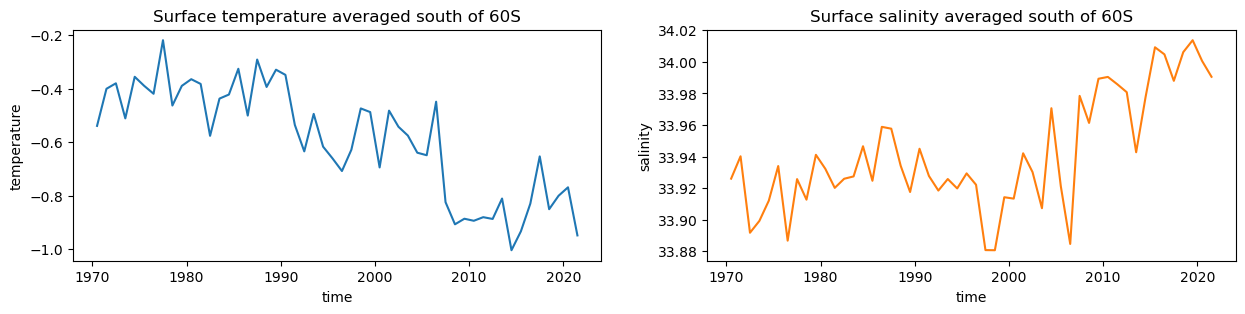

In [42]:
fig, axs = plt.subplots(1, 2, figsize = (15, 3))
surface_temp_averaged.plot(ax = axs[0], color = 'C0')
surface_salt_averaged.plot(ax = axs[1], color = 'C1')
axs[0].set_title('Surface temperature averaged south of 60S')
axs[1].set_title('Surface salinity averaged south of 60S')
axs[0].set_label('degC')
axs[1].set_label('PSU');

Note that our data is on a regular *latitude, longitude* grid; but that the distances in metres between gridpoints varies with latitude due to the Earth's curvature. So in order to do a numerically correct average, we have to weight it by grid cell area. We won't do that for now, but you are free to try it!

#### Question 5

Now plot the zonal average of the change between the last and first decade of the product, like when we plotted our `temp_zonal_ave`.

Use an appropriate colorbar - usually when plotting a difference or an anomaly, we choose a "diverging" colorbar, where the zero tends to white, and positive and negative values have different colors (like `RdBu_r` above). When you look at the colorbar catalogs, and you choose a colormap you like but you'd like it reversed, just add the `_r` at the end.

*Answer here*

## Hovmoller plot

Let's try another way of visualising this changes. Hovmoller plots are figures in which one of the dimensions is spatial, and the other dimension is time. It can be used to look at wave propagation for example. But we will use it to look at whether the vertically averaged temperature and salinities have changed throughout the years.

In other words, we will do a spatial average and plot depth vs years. We will begin by the most straighforward way of averaging, using `.mean()` over the latitude, longitude dimensions:

In [28]:
temp_time_series = EN422['temperature'].mean(['lat','lon'])-273.15
salt_time_series = EN422['salinity'].mean(['lat', 'lon'])

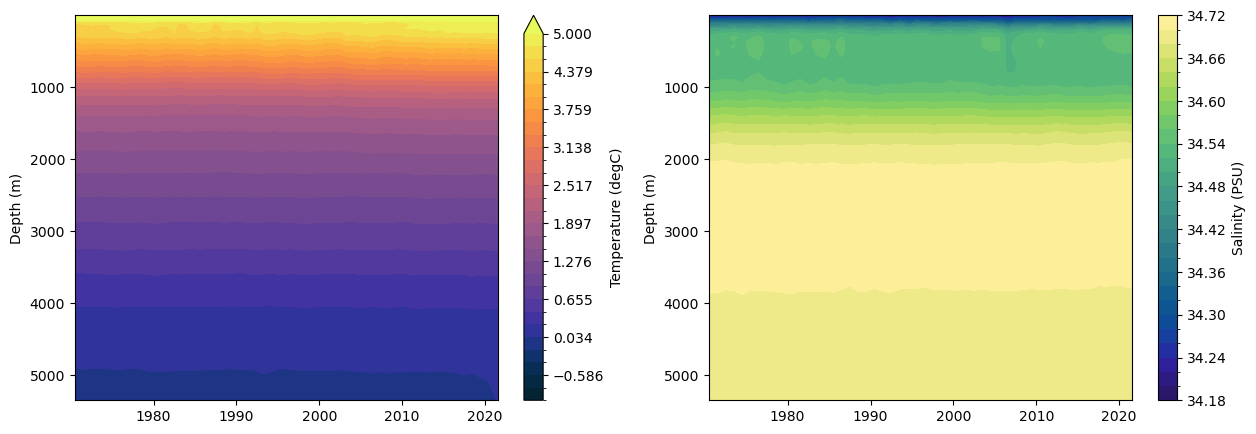

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))

temp_time_series.transpose().plot.contourf(ax = axs[0], vmin = -1, vmax = 5, levels = 30,
                                           cmap = cm.cm.thermal, 
                                           cbar_kwargs = {'label':'Temperature (degC)'})
salt_time_series.transpose().plot.contourf(ax = axs[1],  levels = 30,
                                           cmap = cm.cm.haline, 
                                           cbar_kwargs = {'label':'Salinity (PSU)'})
for ax in axs:
    ax.invert_yaxis()
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('');

Let's zoom in at the surface:

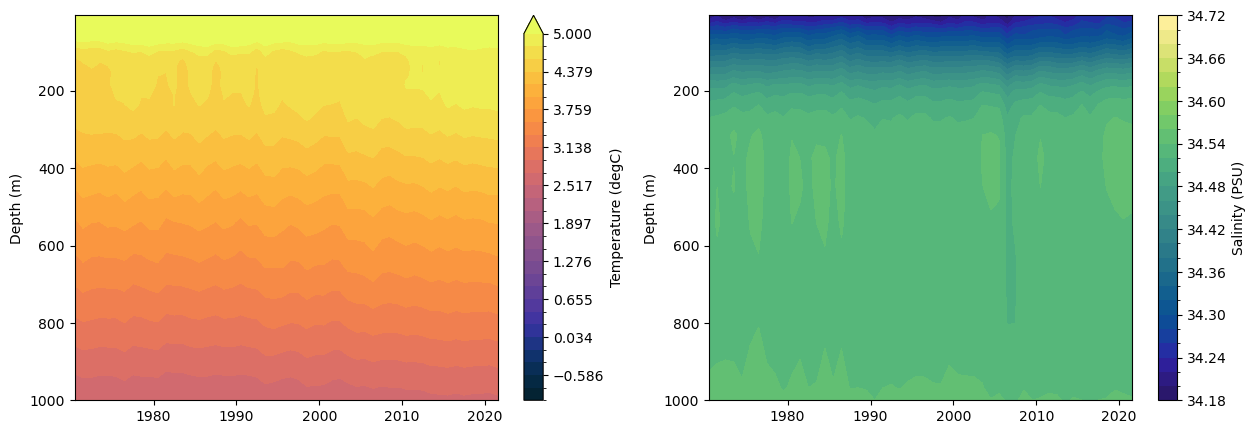

In [31]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))

temp_time_series.transpose().plot.contourf(ax = axs[0], vmin = -1, vmax = 5, levels = 30,
                                           cmap = cm.cm.thermal, 
                                           cbar_kwargs = {'label':'Temperature (degC)'})
salt_time_series.transpose().plot.contourf(ax = axs[1],  levels = 30,
                                           cmap = cm.cm.haline, 
                                           cbar_kwargs = {'label':'Salinity (PSU)'})
for ax in axs:
    ax.invert_yaxis()
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('');
    ax.set_ylim(1000, None)

#### Question 6

Describe the changes that you can see in the spatial maps and the depth vs year plots.

Can you think of other ways of visualising changes?

*Answer here*

#### Question 7

Can you calculate density using the `gsw` library? Repeat the plots we have done with temperature and salinity and describe the changes you observe. 

*Answer here*